In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

LOADING THE DATASET

In [9]:
df = pd.read_csv('diabetes.csv')

In [11]:
#diplaying the head of the provided daataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#description of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
#finding the shape of the dataset
df.shape

(768, 9)

In [15]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
15           136      70             32             110      37.1  0.153                     43   1          1
2            87       58             16             52       32.7  0.166                     25   0          1
                      0              23             0        28.9  0.773                     25   0          1
             85       65             0              0        39.6  0.930                     27   0          1
                                                                                                            ..
5            106      82             30             0        39.5  0.286                     38   0          1
             105      72             29             325      36.9  0.159                     28   0          1
      

In [17]:
#differnt datatypes in the dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [18]:
#Column contents
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Checking for Null Values

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [22]:
df.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Exploratory Data Analysis

In [23]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

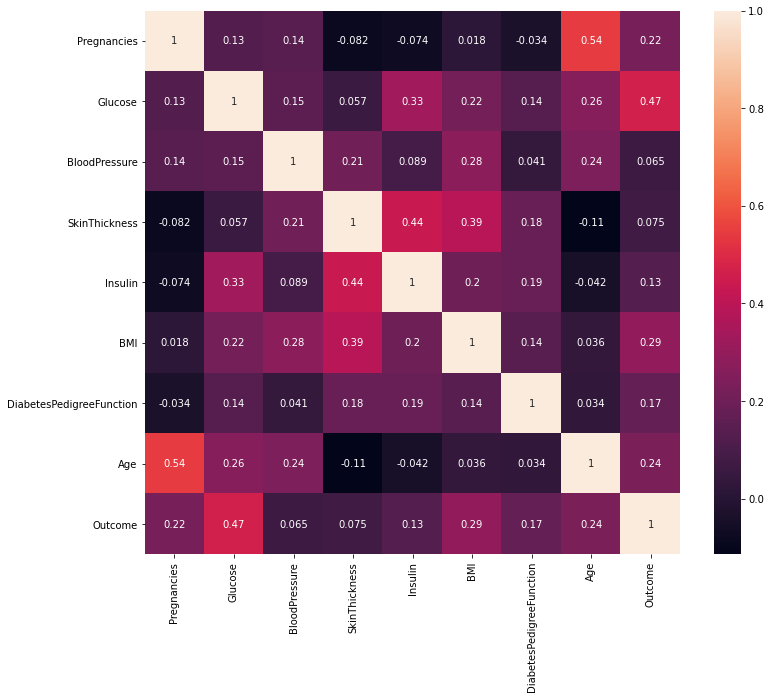

In [27]:
#Plotting a heatmap
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

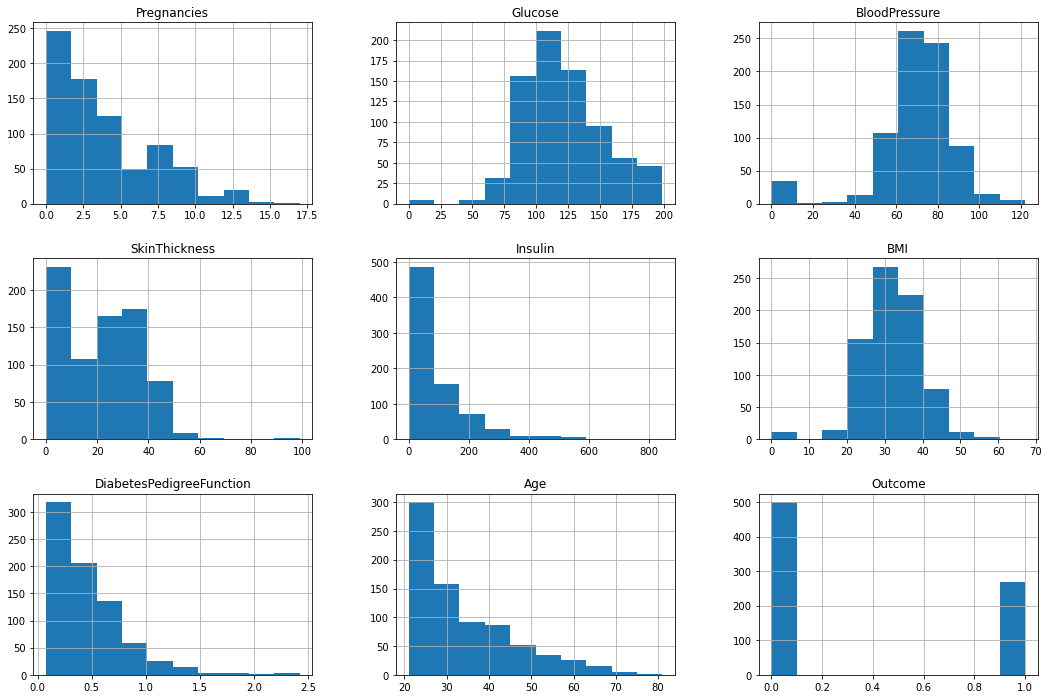

In [30]:
#Histogram
df.hist(figsize = (18,12))

plt.show()

<AxesSubplot:xlabel='SkinThickness'>

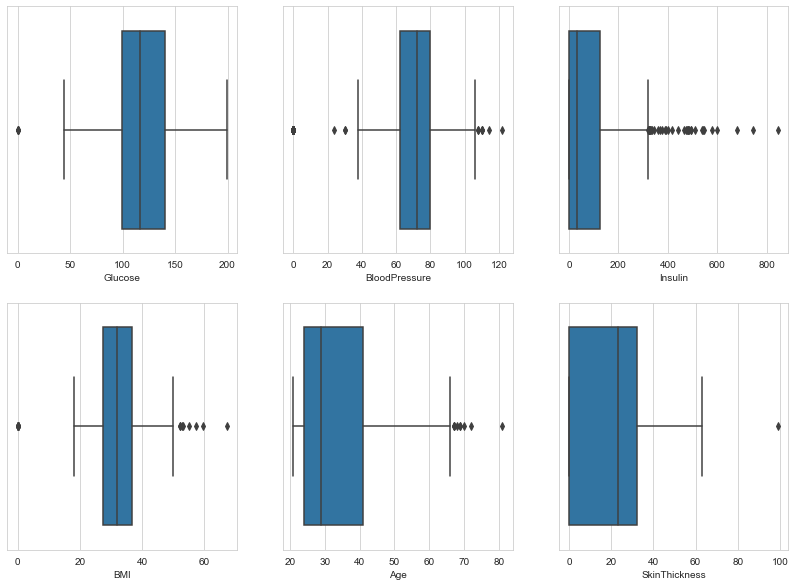

In [34]:
plt.figure(figsize = (14,10))
sns.set_style(style = 'whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df)

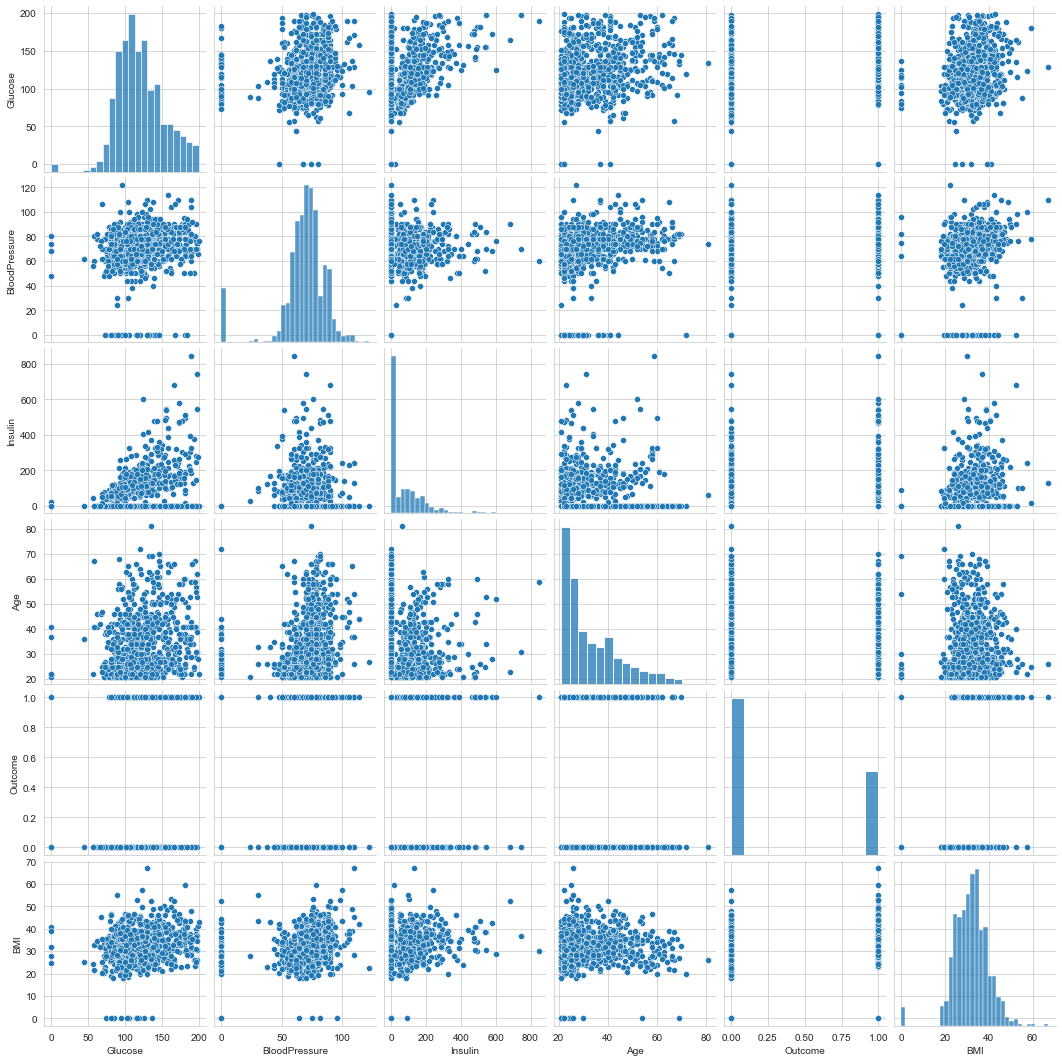

In [35]:

mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(df[mean_col],palette='Accent')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

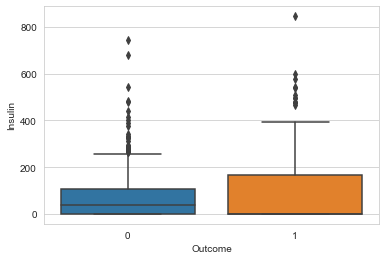

In [36]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data=df)

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

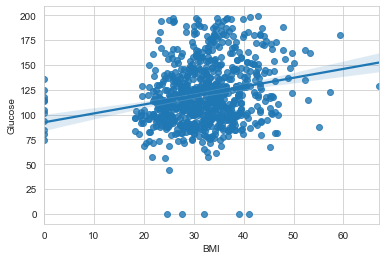

In [37]:
sns.regplot(x = 'BMI', y = 'Glucose', data=df)

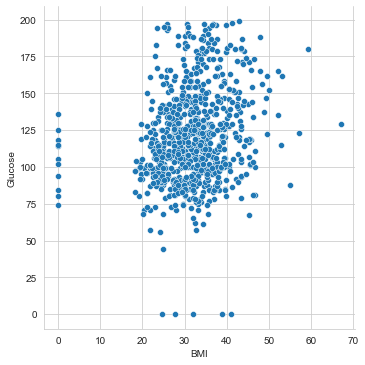

In [38]:
sns.relplot(x = 'BMI', y = 'Glucose', data=df)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

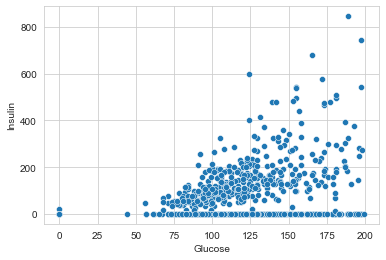

In [39]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data=df)

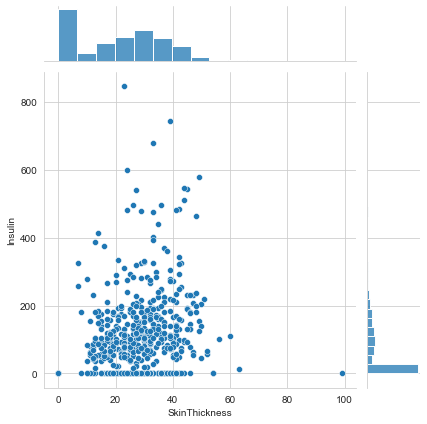

In [40]:
sns.jointplot(x = 'SkinThickness', y = 'Insulin', data=df)

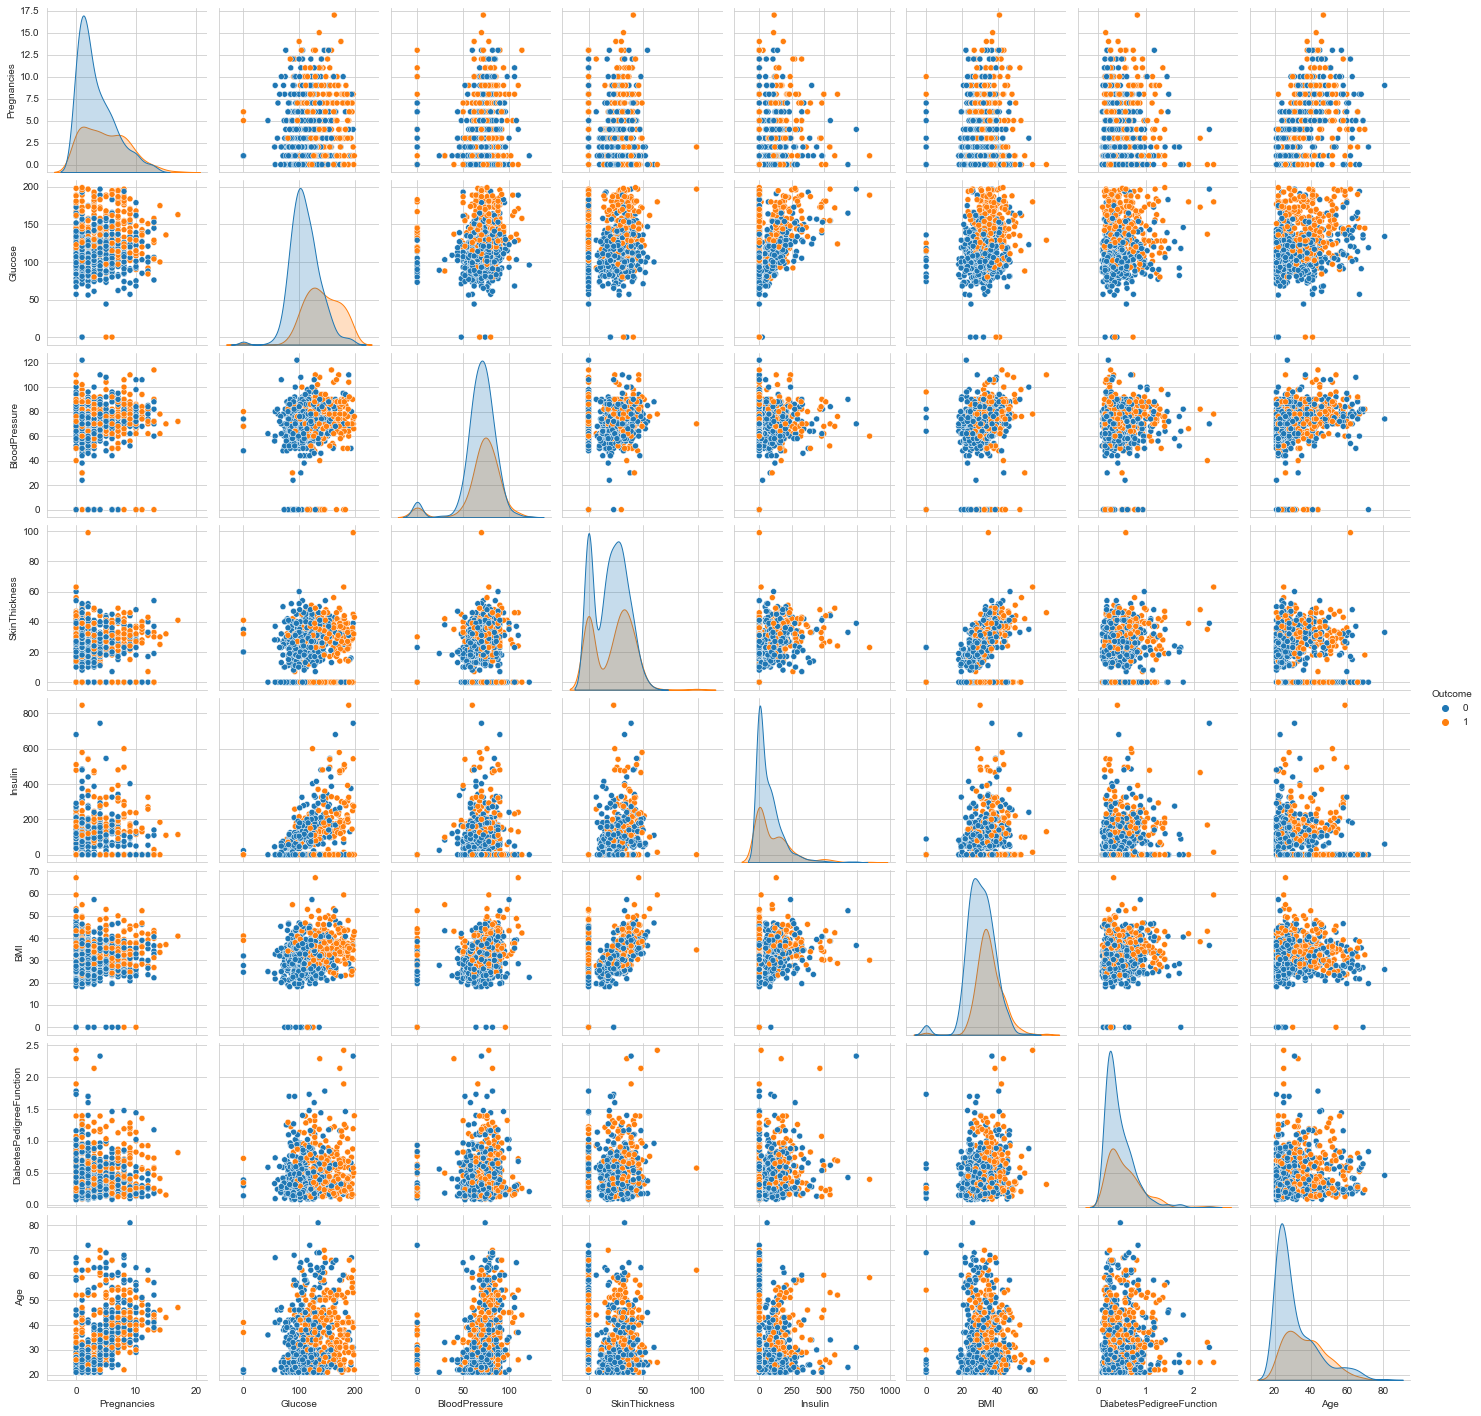

In [44]:
sns.pairplot(df,hue = 'Outcome')

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

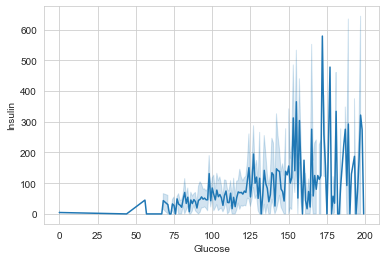

In [45]:
sns.lineplot(x = 'Glucose', y = 'Insulin', data=df)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

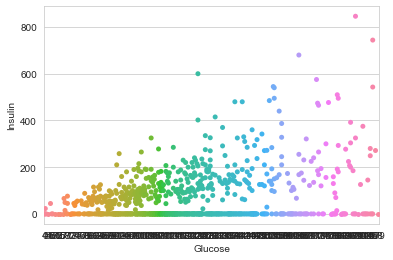

In [46]:
sns.swarmplot(x = 'Glucose', y = 'Insulin', data=df)

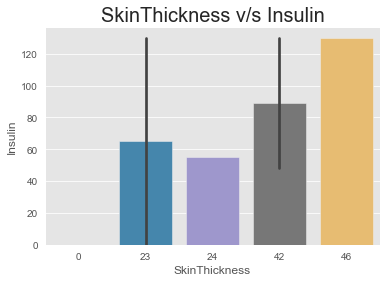

In [58]:
sns.barplot(x = 'SkinThickness', y = 'Insulin', data=df[170:180])
plt.title("SkinThickness v/s Insulin",fontsize = 20)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

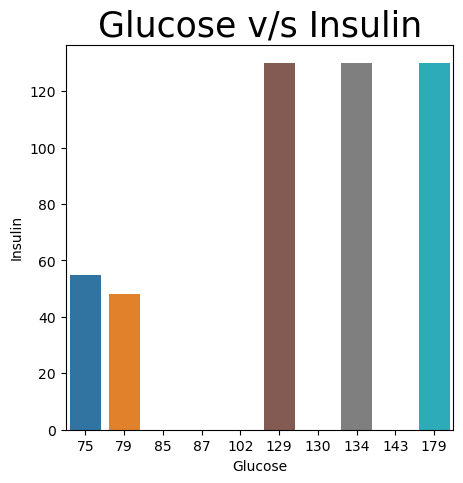

In [60]:
plt.style.use("default")
plt.figure(figsize = (5,5))
sns.barplot(x = 'Glucose', y = 'Insulin', data=df[170:180])
plt.title("Glucose v/s Insulin", fontsize = 25)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

TRAINING AND TESTING OF THE GIVEN DATA

In [61]:
# train_test_splitting of the dataset

x = df.drop(columns = 'Outcome')

# Getting Predicting value
y = df['Outcome']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


# DIFFERENT MODELS

# 1.Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred = reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[98  9]
 [18 29]]
Training Score:
 77.19869706840392
Mean Squared Error:
 0.17532467532467533
R2 score is:
 0.1731954662954862


In [66]:
print(accuracy_score(y_test,y_pred)*100)

82.46753246753246


We get an accuracy score of 82.46% using Logistic Regression

# 2.KNeighboursClassifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [71]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.61      0.57      0.59        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[90 17]
 [20 27]]
Training Score:
 78.17589576547232
Mean Squared Error:
 0.24025974025974026
R2 score is:
 -0.13302843507655582


In [72]:
print(accuracy_score(y_test,y_pred)*100)

75.97402597402598


Her we get an accuracy of 75.97% using KNeighborsClassifier

# SVC

In [73]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [76]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Traning Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[98  9]
 [23 24]]
Traning Score:
 75.8957654723127
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [77]:
print(accuracy_score(y_test,y_pred)*100)

79.22077922077922


Here we get an accuracy of 79.22% using SVC

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0
